In [1]:
%pylab inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [120]:
video = cv2.VideoCapture('../videos/Untitled.mp4')

if not video.isOpened():
    print("Could not open video")

In [121]:
ok, frame = video.read()
if not ok:
    print('Cannot read video file')

In [122]:
start = time.time()

firstFrame = None

try:
    #for i in range(10):
    i = 0
    x_points, y_points = [], []
    while True:
        # Read a new frame
        ok, frame = video.read()
        
        if not ok:
            print('not ok')
            break
    
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (21, 21), 0)
        # if the first frame is None, initialize it
        if firstFrame is None:
            firstFrame = gray
            continue
        
        # compute the absolute difference between the current frame and
        # first frame
        frameDelta = cv2.absdiff(firstFrame, gray)
        thresh = cv2.threshold(frameDelta, 25, 255, cv2.THRESH_BINARY)[1]

        # dilate the thresholded image to fill in holes, then find contours
        # on thresholded image
        thresh = cv2.dilate(thresh, None, iterations=2)
        _, cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
        '''
        # loop over the contours
        for c in cnts:
            # if the contour is too small, ignore it
            print(cv2.contourArea(c))
            if cv2.contourArea(c) < 5:
                continue
        '''
        
        #print(i, len(cnts))
        
        for c in cnts:
            print(cv2.contourArea(c))
            # compute the bounding box for the contour, draw it on the frame,
            # and update the text
            if 1000 < cv2.contourArea(c) < 5000:
                #print(cv2.contourArea(c))
                #print(w/h)
                (x, y, w, h) = cv2.boundingRect(c)
                if 1.2 < w/h < 3:
                    #cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 5)
                    print(x+w/2,y+h/2)
                    x_points.append(x+w//2)
                    y_points.append(frame.shape[0] - y+h//2)
                    cv2.circle(frame, (x+w//2, y+h//2), 5, (0, 255, 0))
         
        # Turn off the axis
        axis('on')
        # Title of the window
        title("Input Stream")
        # Display the frame
        #thresh = np.uint8(thresh) * 255
        imshow(frame)
        show()
        # Display the frame until new frame is available
        i += 1
        
        
        if i > 0 and i % 10 == 0 and all([cv2.contourArea(c) < 100 for c in cnts]):
            firstFrame = gray
            
        '''
        print(len(keyPoints))
        for k in keyPoints:
            print(k.size)
        '''
        
        clear_output(wait=True)

        
except KeyboardInterrupt:
    # Release the Video Device
    video.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")



184.5
700.5
3191.5
316.0 394.0
Released Video Resource


In [124]:
y_points

[736,
 716,
 736,
 716,
 736,
 703,
 736,
 689,
 736,
 677,
 736,
 666,
 736,
 658,
 736,
 652,
 736,
 643,
 735,
 647,
 736,
 736,
 736,
 630,
 736,
 736,
 736,
 736,
 736]

In [79]:
frame.shape[0]

1080

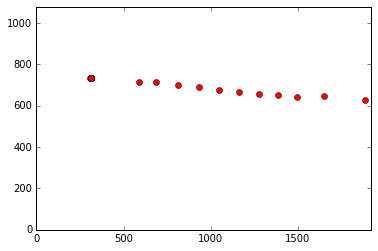

In [123]:
plt.plot(x_points, y_points, 'ro')
plt.axis([0, frame.shape[1], 0, frame.shape[0]])
plt.show()

In [ ]:
'''
params = cv2.SimpleBlobDetector_Params()
# Disable unwanted filter criteria params
params.filterByInertia = False
params.filterByConvexity = False
params.filterByArea = True

params.minArea = 5
params.maxArea = 30

# Change thresholds
params.minThreshold = 10   # the graylevel of images
params.maxThreshold = 200

params.filterByColor = True
params.blobColor = 255

detector = cv2.SimpleBlobDetector_create(params)
'''

In [ ]:
start = time.time()

try:
    #for i in range(10):
    while True:
        # Read a new frame
        ok, frame2 = video.read()
        
        if not ok:
            print('not ok')
            break
    
        
        diff = cv2.absdiff(frame2, frame)
        diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        diff_mask = diff[:,:,1] > 10
    
        '''
        im_diff = np.uint8(diff_mask) * 255
        keyPoints = detector.detect(im_diff)
        im_with_keyPoints = cv2.drawKeypoints(im_diff, keyPoints, np.array([]), (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        ''' 
         
        # Turn off the axis
        axis('on')
        # Title of the window
        title("Input Stream")
        # Display the frame
        imshow(diff_gray)
        show()
        # Display the frame until new frame is available
        
        '''
        print(len(keyPoints))
        for k in keyPoints:
            print(k.size)
        '''
        
        clear_output(wait=True)

        frame = frame2
        
except KeyboardInterrupt:
    # Release the Video Device
    video.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")



In [ ]:
diff.shape